In [1]:
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from sklearn.dummy import DummyClassifier
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

import keras
from sklearn import metrics

import matplotlib.pyplot as plt


import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
letters = fetch_ucirepo(id=59) 
# data (as pandas dataframes) 
X = letters.data.features 
y = letters.data.targets 
# variable information 
print(letters.variables)

     name     role         type demographic                    description  \
0   lettr   Target  Categorical        None                 capital letter   
1   x-box  Feature      Integer        None     horizontal position of box   
2   y-box  Feature      Integer        None       vertical position of box   
3   width  Feature      Integer        None                   width of box   
4    high  Feature      Integer        None                  height of box   
5   onpix  Feature      Integer        None              total # on pixels   
6   x-bar  Feature      Integer        None     mean x of on pixels in box   
7   y-bar  Feature      Integer        None     mean y of on pixels in box   
8   x2bar  Feature      Integer        None                mean x variance   
9   y2bar  Feature      Integer        None                mean y variance   
10  xybar  Feature      Integer        None           mean x y correlation   
11  x2ybr  Feature      Integer        None              mean of

In [3]:
scaler = StandardScaler() 
X.loc[:,:] = scaler.fit_transform(X)
y = np.array(y)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_cat=keras.utils.to_categorical(y)


C:\Users\luluk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
X_train, X_test=train_test_split(X, test_size=0.2, random_state=0)
y_train=y_cat[X_train.index.values,:]
y_test=y_cat[X_test.index.values,:]
print('X_train shape = ', X_train.shape)
print('X_test shape = ', X_test.shape)

X_train shape =  (16000, 16)
X_test shape =  (4000, 16)


In [5]:
dense = Sequential()
dense_0 = Flatten()
dense_1 = Dense(units = 100, input_dim = 15, kernel_initializer ='normal', activation ='relu')            
dense_2 = Dense(units = 26, kernel_initializer ='normal', activation ='softmax')
dense.add(dense_0)
dense.add(dense_1)
dense.add(dense_2)
dense.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
training_history_dense = dense.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 1, batch_size=128)

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 2.8013 - accuracy: 0.3278 - val_loss: 2.1867 - val_accuracy: 0.4812
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 1.7299 - accuracy: 0.5803 - val_loss: 1.4091 - val_accuracy: 0.6569
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 1.2334 - accuracy: 0.6787 - val_loss: 1.1112 - val_accuracy: 0.7159
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 1.0225 - accuracy: 0.7230 - val_loss: 0.9589 - val_accuracy: 0.7453
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.8969 - accuracy: 0.7566 - val_loss: 0.8610 - val_accuracy: 0.7638
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.8076 - accuracy: 0.7785 - val_loss: 0.7864 - val_accuracy: 0.7856
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.7955 - val_loss: 0.7292 - val_accuracy: 0.7962

In [6]:
train_acc = training_history_dense.history['accuracy']
val_acc = training_history_dense.history['val_accuracy']

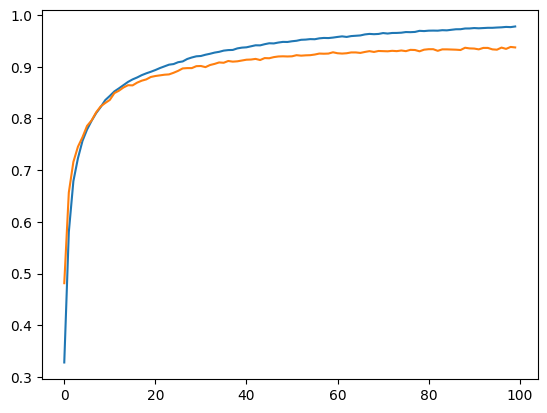

In [7]:
plt.plot(train_acc)
plt.plot(val_acc)

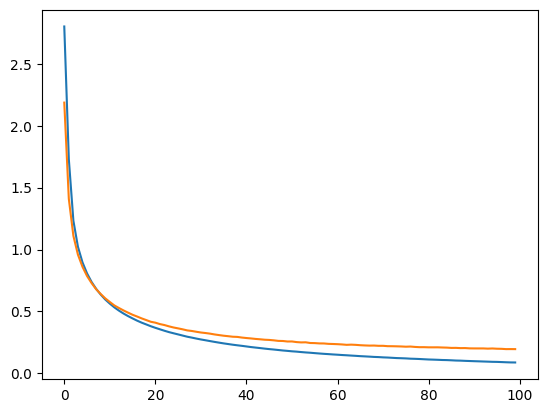

In [8]:
plt.plot(training_history_dense.history[ 'loss' ])
plt.plot(training_history_dense.history[ 'val_loss' ])

In [9]:
test_pred=dense.predict(X_test)
print(dense.evaluate(X_test,y_test))
test_pred_class=test_pred.argmax(axis=1)
y_test_class=y_test.argmax(axis=1)
print(classification_report(y_test_class,test_pred_class))

125/125 [==============================] - 0s 876us/step - loss: 0.1633 - accuracy: 0.9470
[0.16328075528144836, 0.9470000267028809]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       147
           1       0.95      0.92      0.93       158
           2       0.96      0.99      0.97       156
           3       0.96      0.88      0.92       171
           4       0.94      0.90      0.92       145
           5       0.92      0.90      0.91       167
           6       0.93      0.96      0.94       182
           7       0.89      0.93      0.91       123
           8       0.96      0.91      0.93       127
           9       0.94      0.94      0.94       159
          10       0.94      0.90      0.92       143
          11       0.97      0.96      0.97       159
          12       0.98      0.95      0.96       173
          13       0.94      0.97      0.95       134
          14       0.95      0.97      0.96       142
  

In [10]:
print(confusion_matrix(y_test_class,test_pred_class))

[[141   0   0   1   0   0   0   1   0   1   0   0   0   0   1   0   0   1
    0   0   0   0   1   0   0   0]
 [  0 145   0   0   0   0   2   1   0   0   1   0   0   0   0   0   0   3
    3   0   0   3   0   0   0   0]
 [  0   0 154   0   0   0   1   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  1   3   0 151   0   1   0   4   0   1   1   0   0   1   0   2   0   3
    1   1   0   0   0   1   0   0]
 [  0   1   2   0 131   1   3   0   0   0   0   3   0   0   0   0   3   0
    0   0   0   0   0   0   0   1]
 [  0   1   0   1   0 151   0   0   1   0   0   0   0   2   1   5   0   0
    1   3   0   0   1   0   0   0]
 [  0   0   0   1   1   0 174   0   0   0   0   1   0   0   1   0   0   2
    0   0   0   2   0   0   0   0]
 [  0   1   0   1   0   0   1 115   0   0   2   0   0   0   0   0   0   3
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0 115   7   0   0   0   0   0   0   0   0
    3   1   0   0   0   0   0   0]
 [  1   0   0   0  

In [11]:
y_train_RF=y[X_train.index.values]
y_test_RF=y[X_test.index.values]

In [12]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_RF)

DummyClassifier()

In [13]:
test_pred_dummy_RF=dummy_clf.predict(X_test)
print(accuracy_score(y_test_RF,test_pred_dummy_RF))

0.04


In [14]:
Ada=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),n_estimators=20, random_state=0)
Ada.fit(X_train, y_train_RF)
AdaBoost = [accuracy_score(y_test_RF, y_pred_Ada) for y_pred_Ada in list(Ada.staged_predict(X_test))]
print(AdaBoost[-1])

0.96925


C:\Users\luluk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [15]:
GB=HistGradientBoostingClassifier(max_iter=20, random_state=0)
GB.fit(X_train, y_train_RF)
GBhist = [accuracy_score(y_test_RF, y_pred_GB) for y_pred_GB in list(GB.staged_predict(X_test))]
print(GBhist[-1])

0.9405


In [16]:
BChist=[]
for i in range(1,21):
    BC=BaggingClassifier(n_estimators=i, random_state=0, n_jobs=-1)
    BC.fit(X_train, y_train_RF)
    y_pred_BC = BC.predict(X_test)
    BChist.append(accuracy_score(y_test_RF, y_pred_BC))
print(BChist[-1])

0.93925


In [17]:
RFhist=[]
for i in range(1,21):
    RF=RandomForestClassifier(n_estimators=i, random_state=0, n_jobs=-1)
    RF.fit(X_train, y_train_RF)
    y_pred_RF = RF.predict(X_test)
    RFhist.append(accuracy_score(y_test_RF, y_pred_RF))
print(RFhist[-1])

0.9535


In [37]:
Dhist=[]
optimizerD = Adam(learning_rate=0.01)
dense = Sequential()
dense.add(Dense(units = 1, input_dim = X_train.shape[1], kernel_initializer ='normal', activation ='ReLU'))
dense.add(Dropout(0.2))
dense.add(Dense(1, activation='relu'))
dense.add(Dropout(0.2))
dense.add(Dense(1, activation='relu'))
dense.add(Dropout(0.2))     
dense.add(Dense(units = 26, activation ='softmax'))

for i in range(2,9):
    dense.layers[0].
    dense.layers[2].units=2**i
    dense.layers[4].units=2**i
    dense.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizerD)
    dense.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0, batch_size=128)
    test_pred=dense.predict(X_test)
    test_pred_class=test_pred.argmax(axis=1)
    y_test_class=y_test.argmax(axis=1)
    Dhist.append(accuracy_score(y_test_class,test_pred_class))


125/125 [==============================] - 0s 863us/step


In [45]:
dense.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
 dropout_12 (Dropout)        (None, 1)                 0         
                                                                 
 dense_25 (Dense)            (None, 1)                 2         
                                                                 
 dropout_13 (Dropout)        (None, 1)                 0         
                                                                 
 dense_26 (Dense)            (None, 1)                 2         
                                                                 
 dropout_14 (Dropout)        (None, 1)                 0         
                                                                 
 dense_27 (Dense)            (None, 26)              

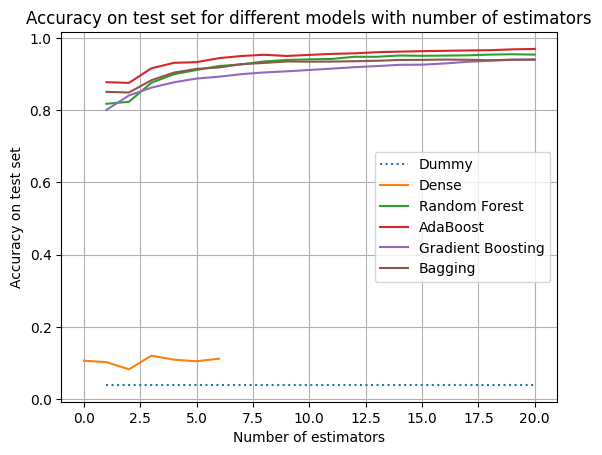

In [38]:
from numpy import linspace
a=linspace(1, 20, 20)
fig, ax = plt.subplots()
ax.set_ylabel("Accuracy on test set")
ax.set_xlabel("Number of estimators")
ax.set_title("Accuracy on test set for different models with number of estimators")
plt.plot([1, 20],[accuracy_score(y_test_RF,test_pred_dummy_RF),accuracy_score(y_test_RF,test_pred_dummy_RF)],linestyle="dotted")
plt.plot(Dhist)
plt.plot(a,RFhist)
plt.plot(a,AdaBoost)
plt.plot(a,GBhist)
plt.plot(a,BChist)
plt.legend(["Dummy","Dense","Random Forest","AdaBoost","Gradient Boosting","Bagging"])
plt.grid()
plt.show()

In [ ]:
# Random Forest
test_pred_RF=RF.predict(X_test)
confusion_matrix_RF = confusion_matrix(y_test_RF,test_pred_RF)
print('Often confused classes for Random Forest:')
for i in range(26):
    for j in range(26):
        if i!=j and confusion_matrix_RF[i,j]>5:
            print(label_encoder.inverse_transform([i])[0],'and',label_encoder.inverse_transform([j])[0],'are often confused')

# AdaBoost
test_pred_Ada=Ada.predict(X_test)
confusion_matrix_Ada = confusion_matrix(y_test_RF,test_pred_Ada)
print('Often confused classes for AdaBoost:')
for i in range(26):
    for j in range(26):
        if i!=j and confusion_matrix_Ada[i,j]>5:
            print(label_encoder.inverse_transform([i])[0],'and',label_encoder.inverse_transform([j])[0],'are often confused')

# Gradient Boosting
test_pred_GB=GB.predict(X_test)
confusion_matrix_GB = confusion_matrix(y_test_RF,test_pred_GB)
print('Often confused classes for Gradient Boosting:')
for i in range(26):
    for j in range(26):
        if i!=j and confusion_matrix_GB[i,j]>5:
            print(label_encoder.inverse_transform([i])[0],'and',label_encoder.inverse_transform([j])[0],'are often confused')

# Bagging
test_pred_BC=BC.predict(X_test)
confusion_matrix_BC = confusion_matrix(y_test_RF,test_pred_BC)
print('Often confused classes for Bagging:')
for i in range(26):
    for j in range(26):
        if i!=j and confusion_matrix_BC[i,j]>5:
            print(label_encoder.inverse_transform([i])[0],'and',label_encoder.inverse_transform([j])[0],'are often confused')

Often confused classes for Random Forest:
F and P are often confused
Often confused classes for AdaBoost:
J and I are often confused
Often confused classes for Gradient Boosting:
P and F are often confused
R and B are often confused
Often confused classes for Bagging:
B and R are often confused
I and J are often confused


In [22]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
100/100 [==============================] - 2s 4ms/step - loss: 2.2273 - accuracy: 0.3580 - val_loss: 1.2240 - val_accuracy: 0.6450
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 1.2509 - accuracy: 0.6128 - val_loss: 0.8700 - val_accuracy: 0.7522
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 1.0119 - accuracy: 0.6783 - val_loss: 0.7107 - val_accuracy: 0.7912
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.7227 - val_loss: 0.6095 - val_accuracy: 0.8291
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.7539 - val_loss: 0.5412 - val_accuracy: 0.8450
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.7730 - val_loss: 0.4874 - val_accuracy: 0.8609
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.7895 - val_loss: 0.4484 - val_accuracy: 0.8659

Training accuracy: 0.9524219036102295
Validation accuracy: 0.9668750166893005


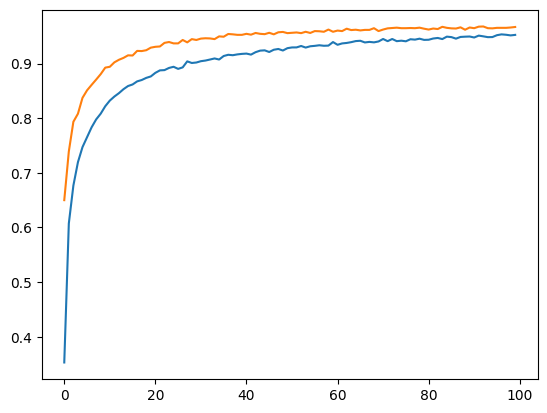

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print('Training accuracy:', train_acc[-1])
print('Validation accuracy:', val_acc[-1])
plt.plot(train_acc)
plt.plot(val_acc)